# Programming Assignment - 7
---
## Name: Aaron Vo
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, transform

import os

## Question 1
---
Follow the example on Eigenfaces to find the eigenface representation of facial images from other sources. You should display some original images and compare them with their reconstructions upon PCA.

Here are some other facial image repositories.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

In [2]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [3]:
def eigenfaces(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    pca_obj = PCA(n_components=n_pc)
    projected  = pca_obj.fit_transform(centered_data)
    #U, S, V = np.linalg.svd(centered_data)
    components = pca_obj.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [4]:
dir = 'mit/training-originals'
photos = os.listdir(dir)[1:1001]
celebrity_images = [dir+'/' + photo for photo in photos]

images=np.array([transform.resize(plt.imread(image), (256,256)) for image in celebrity_images], dtype=np.float64)
face_images = np.array([image.mean(axis=2) for image in images])  # convert to grayscale

n_samples, h, w = face_images.shape

n_components = min(n_samples, 200)
X = face_images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

IsADirectoryError: [Errno 21] Is a directory: 'mit/training-originals/.ipynb_checkpoints'

In [ ]:
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

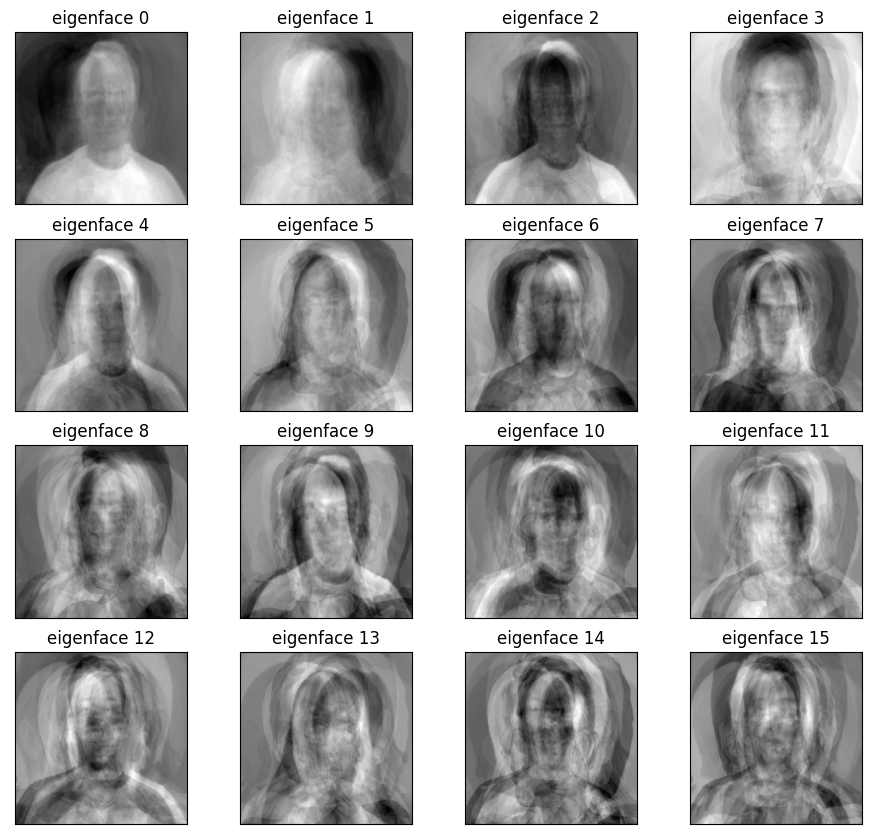

In [35]:
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4) 

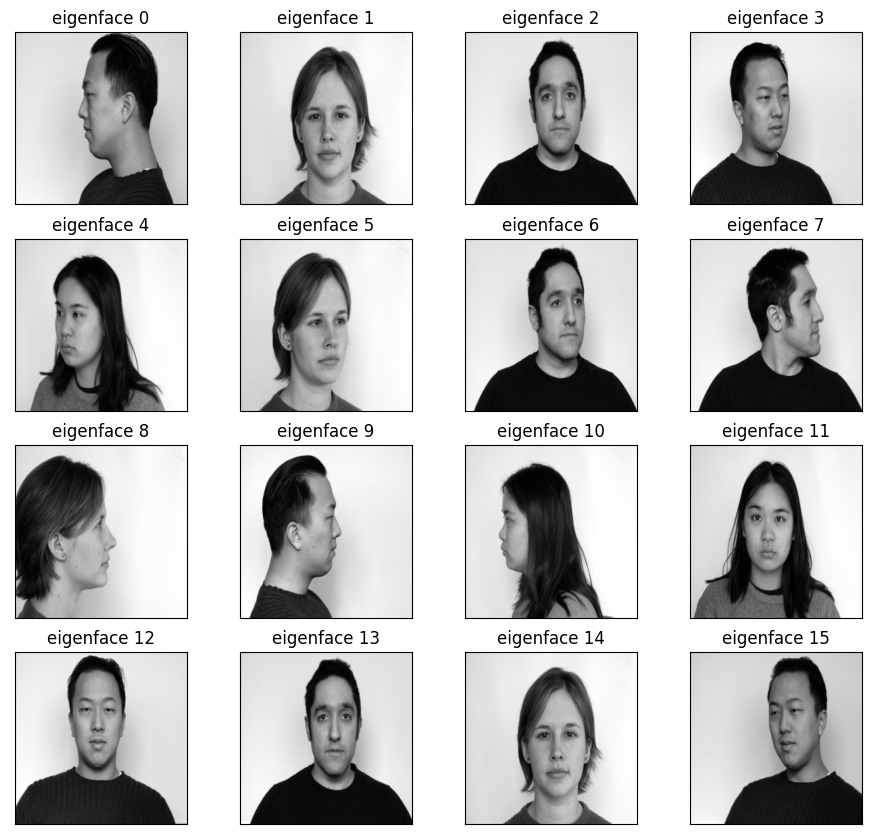

In [36]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, eigenface_titles, h, w, n_row=4, n_col=4)